# SI 618: Dimension Reduction: Background

### Dr. Chris Teplovs, School of Information, University of Michigan
Copyright &copy; 2024.  This notebook may not be shared outside of the course without permission.
### Please ensure you have this version:
Version: 2024.10.24.2.CT

Note: some slides from Eytan Adar and Kevyn Collins-Thompson

## DO NOT SUBMIT THIS NOTEBOOK TO CANVAS!

### Task (to generate data for use later in today's class):
Fill in the [spreadsheet](https://docs.google.com/spreadsheets/d/1VsyEQuIClWgISd_obhS4vzXrqxIkszaQ4PCZC8Nl5xw/edit?usp=sharing) with your music preferences.  Rate each genre on a scale of 1 to 10, with 1 being "no way" and 10 being "the best".  Note that you are indicating your preference for each genre on a scale of 1-10; 
you are not ranking the genres from 1-10.  Thus, you can have all 10s if you love all genres of music, or all 1s if you hate music in general.

## Dimensions & Factors
* Multi-Dimensional Scaling (MDS)
* Principal components analysis (PCA)
* t-distributed Stochastic Neighbor Embedding (t-SNE)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide24.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide25.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide26.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide27.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide28.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide29.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide30.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide31.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide32.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide41.png)

In [1]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


In [2]:


# The following code creates a synthetic dataset
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

In [3]:

# Now create the metric and non-metric MDS models


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data so we can visualize in 2 dimensions
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)


/var/folders/6h/pl4jttxn04s6tt3cys_lkyl40000gn/T/ipykernel_29389/312195582.py:11: RuntimeWarning: divide by zero encountered in divide
  similarities = similarities.max() / similarities * 100


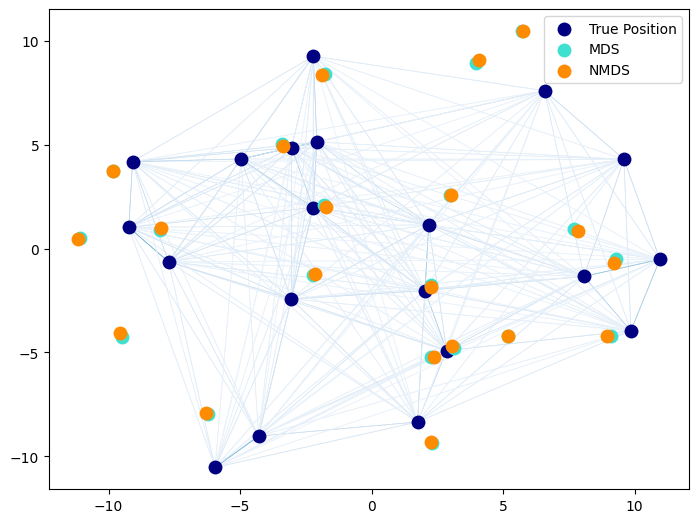

In [4]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

Wait, what was that other dimension reduction we just did?


## Principal Components Analysis (PCA)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide43.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide44.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide45.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide50.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide51.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide52.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide53.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide54.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide55.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide56.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide57.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide58.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide59.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide60.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide61.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide62.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide63.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide64.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide65.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide66.png)

In [7]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# loading the data

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTnvfFzQRzibiGd92rL2UvolprozD3BtqlhzYb8EhA3gdoYEKYrDfoNa1p7sdQZTg4fYJ6VOrZnD4mU/pub?gid=0&single=true&output=csv"
data = pd.read_csv(url)
data.head(10)

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T.,5.0,10.0,6.0,4.0,7.0,4.0,10.0,6.0,5.0,8.0
1,Mads F.,2.0,1.0,5.0,6.0,6.0,6.0,2.0,4.0,9.0,7.0
2,Sualeha F.,9.0,9.0,7.0,8.0,4.0,6.0,8.0,7.0,9.0,9.0
3,Louhith U.,4.0,3.0,7.0,1.0,2.0,7.0,3.0,1.0,5.0,10.0
4,Ruoyi G.,2.0,4.0,2.0,7.0,2.0,1.0,8.0,1.0,7.0,5.0
5,Rachel T.,4.0,3.0,1.0,3.0,8.0,2.0,6.0,3.0,6.0,6.0
6,NaN,NaN,8.0,2.0,6.0,4.0,5.0,7.0,5.0,8.0,5.0
7,Shangqing W.,8.0,7.0,6.0,2.0,2.0,1.0,9.0,3.0,9.0,10.0
8,Jiatai Y.,5.0,5.0,8.0,7.0,6.0,3.0,3.0,2.0,8.0,9.0
9,Anusha P.,5.0,7.0,4.0,6.0,3.0,5.0,5.0,6.0,9.0,9.0


In [9]:
data = data.dropna() # in case there are missing values

In [10]:
data = data.drop('Name',axis=1)

In [11]:
# scaling the data before PCA

from sklearn.preprocessing import scale

data = pd.DataFrame(scale(data), columns=['Blues', 'Classical', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Latin','Pop','Rock'])


In [12]:
data.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,0.327561,2.225797,0.421629,-0.509621,0.773303,-0.500208,1.876320,0.984309,-0.978742,0.279195
1,-1.080951,-2.081121,-0.020567,0.366927,0.382102,0.377708,-1.520807,0.064194,0.812148,-0.201020
2,2.205577,1.747251,0.863825,1.243475,-0.400298,0.377708,1.027038,1.444367,0.812148,0.759409
3,-0.141943,-1.124028,0.863825,-1.824442,-1.182698,0.816667,-1.096166,-1.315979,-0.978742,1.239624
4,-1.080951,-0.645481,-1.347155,0.805201,-1.182698,-1.817083,1.027038,-1.315979,-0.083297,-1.161449


In [14]:
# implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

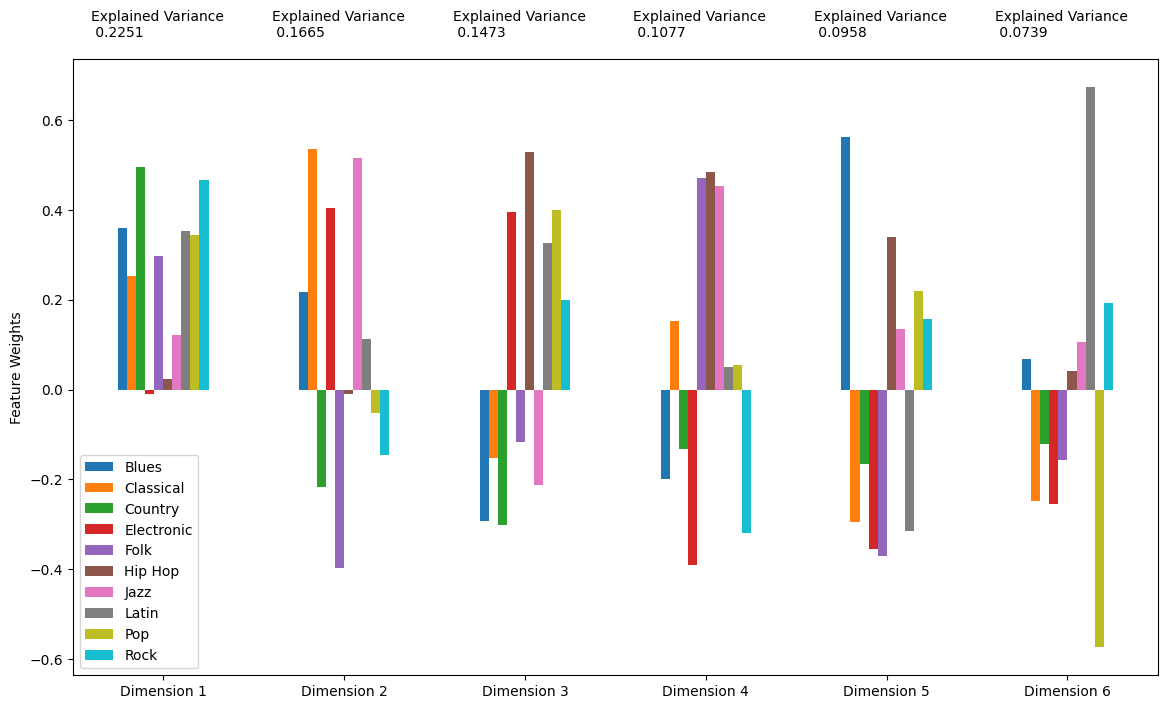

In [15]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [16]:
pca_results.cumsum()

,Explained Variance,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
Dimension 1,0.2251,0.3592,0.2531,0.4945,-0.0095,0.2973,0.0232,0.1205,0.3527,0.3438,0.4650
Dimension 2,0.3916,0.5752,0.7870,0.2780,0.3941,-0.0995,0.0137,0.6349,0.4655,0.2916,0.3202
Dimension 3,0.5389,0.2828,0.6348,-0.0240,0.7889,-0.2173,0.5427,0.4227,0.7917,0.6908,0.5195
Dimension 4,0.6466,0.0843,0.7880,-0.1562,0.3988,0.2539,1.0270,0.8746,0.8425,0.7445,0.2013
Dimension 5,0.7424,0.6467,0.4924,-0.3214,0.0431,-0.1171,1.3651,1.0102,0.5274,0.9646,0.3575
Dimension 6,0.8163,0.7145,0.2436,-0.4428,-0.2109,-0.2733,1.4052,1.1167,1.1995,0.3914,0.5488


![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide68.png)

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide69.png)

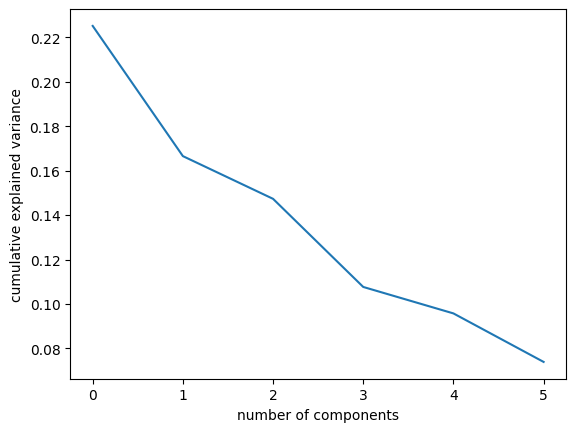

In [17]:
# Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

![](https://github.com/umsi-data-science/si370/raw/master/resources/pca/Slide70.png)

## t-distributed Stochastic Neighbor Embedding (t-SNE)

additional slides: https://docs.google.com/presentation/d/1-JGfXOpHuw6taIvCtEWS_N3cDcE2v0kXSzN63pGSAxU/edit?usp=sharing


code based on https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

Here, we will use another dimension reduction technique, t-SNE, on an image dataset consisting of digits. Our goal here is to see whether images of the same digit are grouped together in 2-D visualizations.

First, let's load the dataset.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

The dataset is a dictionary containing multiple arrays.


|Key   |Value  |Description  |
| --- | --- | --- |
| image | numpy array (1797,8,8) | An 8x8 array for every image in the dataset |
| data | numpy array (1797,64) | An 64 array for every image in the dataset |
| target | numpy array (1797,) | A list containing the label(=digit) for every image in the dataset |

What does each image look like?

In [20]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

When dealing with images in Python, each image is stored as an array, where the location of each value corresponds to its pixel location. The stored value is the color value of that pixel, which ranges between 0-1 or 0-255. When dealing with color images, an image becomes a combination of three different layers (RGB). Here, we are dealing with black and white images, so there is only one dimension.

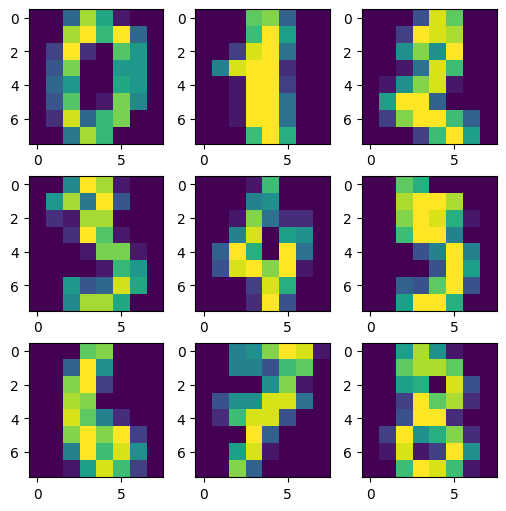

In [20]:
# when plotted as an image
import matplotlib.pyplot as plt
import seaborn as sns

rows = 3
cols = 3
figsize = (5, 5)

fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
for i in range(rows):
    for j in range(cols):
        axs[i,j].imshow(digits.images[i*3+j])
#         axs[i,j]
plt.show()

In [21]:
# import t-SNE package from sklearn
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, random_state=0)
X = digits.data
X_2d = tsne.fit_transform(X)

In [23]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
X_2d

array([[ -3.06619  , -55.124763 ],
       [ 10.622662 ,  11.898785 ],
       [-13.736629 ,  18.904173 ],
       ...,
       [ -5.820781 ,  11.00161  ],
       [-21.105635 , -15.20951  ],
       [-14.116961 ,   7.1163507]], dtype=float32)

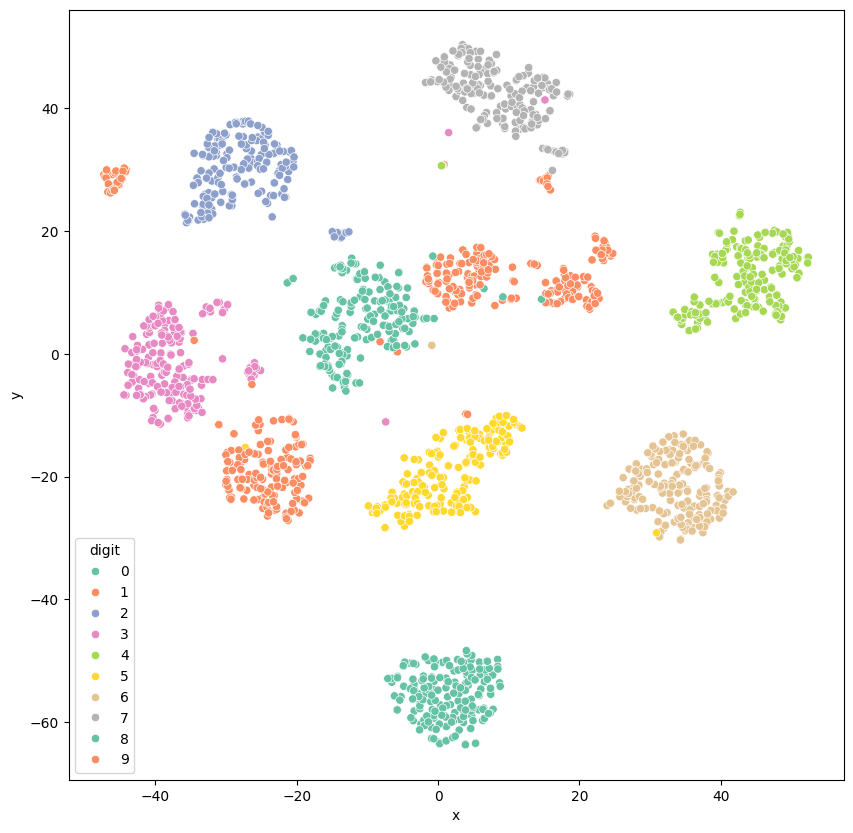

In [25]:
# change to dataframe so that we can run it on seaborn
import pandas as pd
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()

The default hyperparameters provided by sklearn are perplexity=30.0 and n_iter=1000.

See how changing these values can change the separation of the numbers. Typically perplexity works best between 5 and 50. The more number of iterations you run, the better the results will be, but it might take too long to converge. Or it could be that 1000 iterations is already too much, and it can converge even with fewer iterations.


/Users/jonasxie/Documents/umich/courses/SI618/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


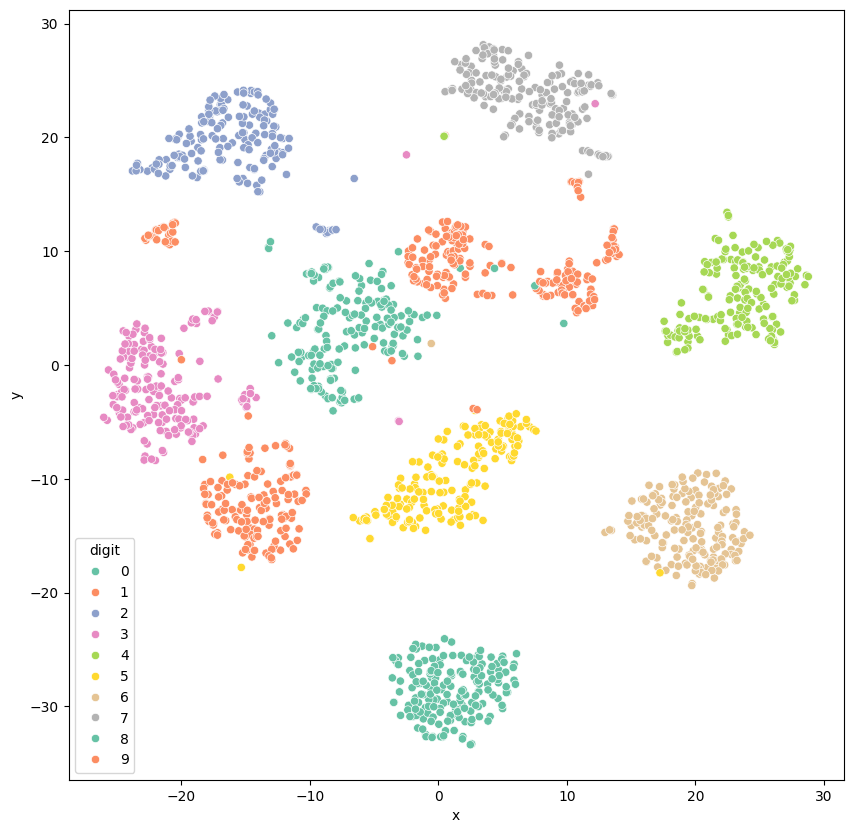

In [26]:
perplexity = 50
n_iter = 500
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=n_iter)
X_2d = tsne.fit_transform(X)
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()

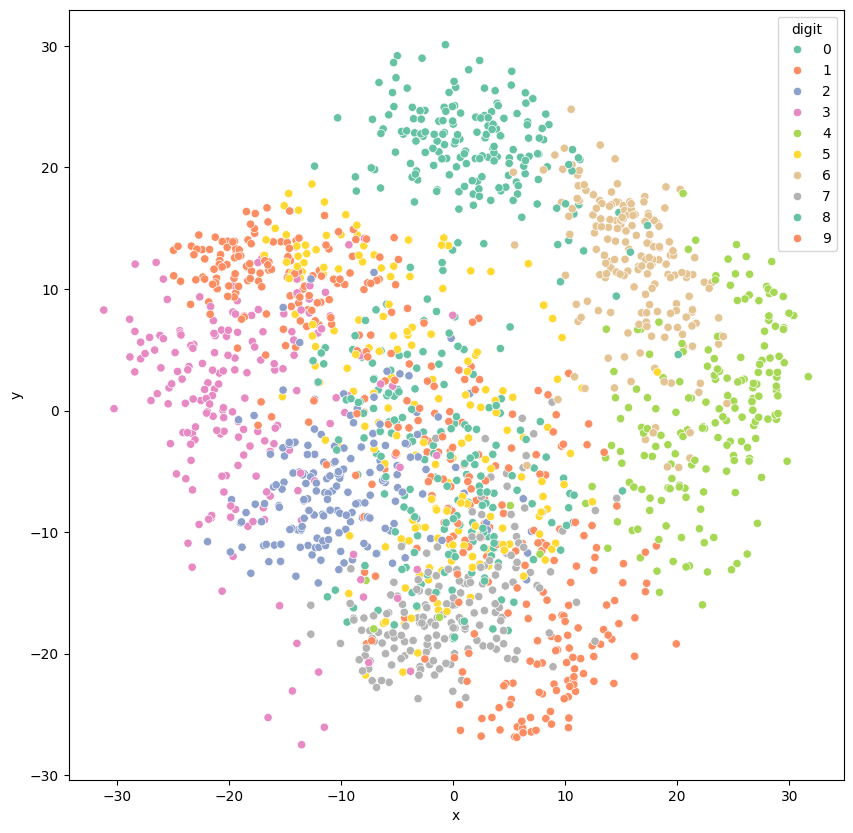

In [29]:
X_2d = PCA(n_components=2).fit_transform(X)
out = []
for i,(x,y) in enumerate(X_2d):
    out.append((digits.target[i],x,y))
df = pd.DataFrame(out,columns=['digit','x','y'])
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='x',y='y',hue='digit',legend='full',palette='Set2')
plt.show()

# DO NOT SUBMIT THIS NOTEBOOK TO CANVAS!
